Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-6-12 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'FIRE DETECTION GUI'

Saving fire3.jpg to fire3.jpg


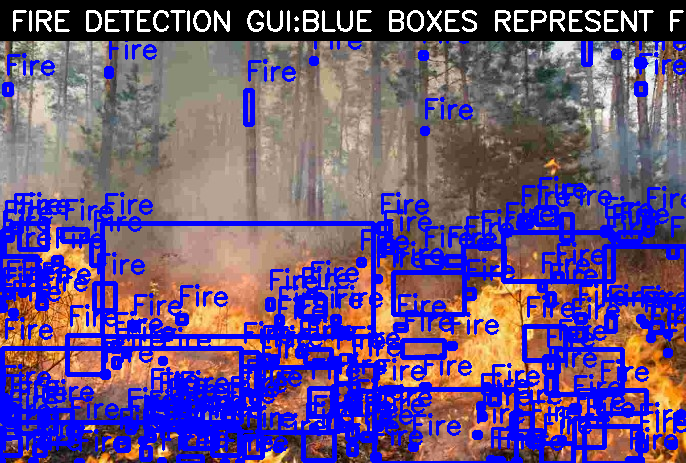

In [ ]:
#upload the image you wish to detect fires in within the running environment of the code, also ensure the image is in your local system
#since this code will ask you to upload it from there
!pip install yolov5

import os
from PIL import Image
import torch
import torchvision.transforms as transforms
import yolov5

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

!pip install opencv-python

import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

def detect_fires(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert BGR to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper thresholds for red color (fire)
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # Create a mask for red color (fire) in the image
    mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
    mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask_red_combined = cv2.bitwise_or(mask_red, mask_red2)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask_red_filtered = cv2.morphologyEx(mask_red_combined, cv2.MORPH_OPEN, kernel)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask_red_filtered, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around the contours (fires)
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)

        # Add text 'Fire detected' next to the bounding box
        cv2.putText(image, 'Fire', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Add a title above the image
    cv2.rectangle(image, (0, 0), (image.shape[1], 40), (0, 0, 0), -1)
    cv2.putText(image, 'FIRE DETECTION GUI:BLUE BOXES REPRESENT FIRE', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

    # Display the image with bounding boxes
    cv2_imshow(image)

def upload_image():
    # Upload an image from your local machine
    from google.colab import files
    uploaded = files.upload()

    # Save the uploaded image
    image_path = list(uploaded.keys())[0]

    # Run fire detection on the uploaded image
    detect_fires(image_path)

# Start the fire detection process
display('FIRE DETECTION GUI')
upload_image()
